In [1]:
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

review       0
sentiment    0
dtype: int64


In [5]:
# Convert to lowercase and remove special characters
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['review'] = df['review'].apply(normalize_text)

In [6]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])

# Convert to sequences
sequences = tokenizer.texts_to_sequences(df['review'])

# Padding/Truncating sequences
padded_sequences = pad_sequences(sequences, padding='post', truncating='post', maxlen=100)

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['review'] = df['review'].apply(remove_stop_words)

In [10]:
df.head(5)

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [11]:
# EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

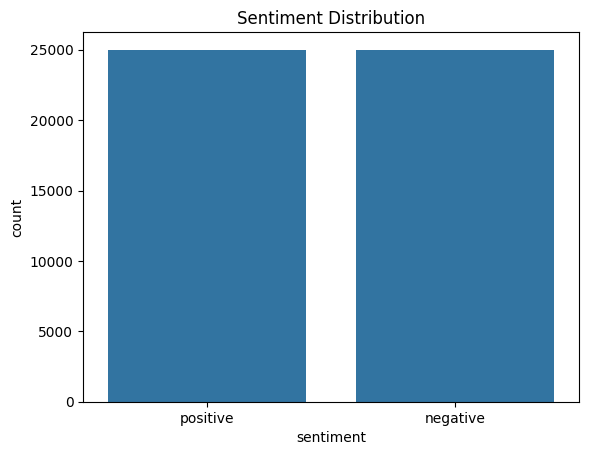

In [14]:
# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

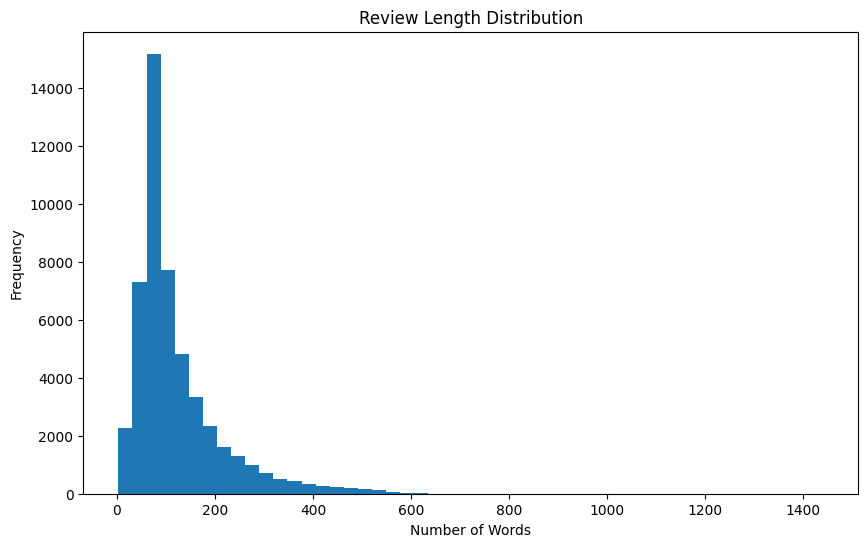

In [15]:
# Calculate review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10,6))
plt.hist(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


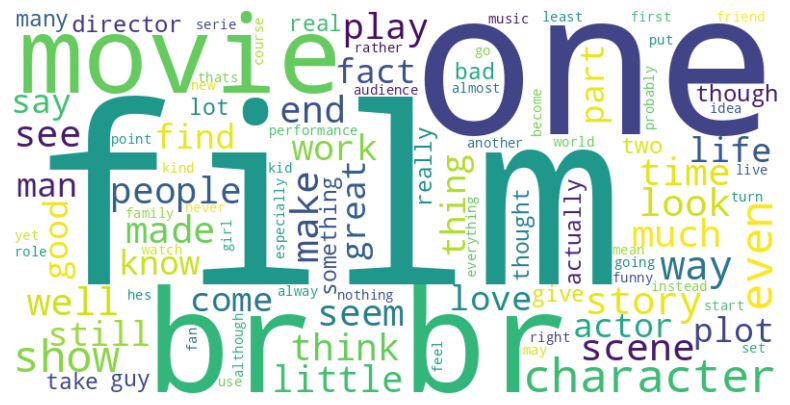

In [16]:
# Combine all reviews from the 'review' column into a single string
text = " ".join(review for review in df['review'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.show()

In [17]:
# Loading dataset into mongodb

In [18]:
! pip install pymongo

  Using cached pymongo-4.10.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached dnspython-2.6.1-py3-none-any.whl.metadata (5.8 kB)
Using cached pymongo-4.10.1-cp312-cp312-win_amd64.whl (926 kB)
Using cached dnspython-2.6.1-py3-none-any.whl (307 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from pymongo import MongoClient

In [20]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Adjust the connection string if needed
db = client['assignment']  # Database name
collection = db['reviews']       # Collection name

# Prepare data for insertion
data_to_insert = []
for index, row in df.iterrows():
    data_to_insert.append({
        "review": row['review'],       # Review text
        "sentiment": row['sentiment'], # Sentiment of the review
    })

# Insert data into MongoDB
collection.insert_many(data_to_insert)

print("Data inserted successfully!")

Data inserted successfully!


In [21]:
# Create an index on the 'sentiment' field
collection.create_index([('sentiment', 1)])  # 1 for ascending order

'sentiment_1'

In [22]:
# Find all positive reviews
positive_reviews = collection.find({"sentiment": "positive"})

for review in positive_reviews:
    print(review)

{'_id': ObjectId('67003c8b6e17daf352b16e61'), 'review': 'one reviewers mentioned watching oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{'_id': ObjectId('67003c8b6e17daf352b1fb1d'), 'review': 'saw movie first time ever liked dancing entertaining read somewhere got part movie knew dance scenery great yvonne talented woman beautiful laughed silly kissing scenes great old movies grew munsters enjoying watching earlier movies may best still worth watching see act sing slowly purchasing movies watching receive large collection memorabilia', 'sentiment': 'positive'}
{'_id': ObjectId('67003c8b6e17daf352b1fb1f'), 'review': 'loved movie worth long running time need help ending thoughbr br spoilerbr br final shot marie end suggest still searching renaud possibly one wanted reinvigorate seemed one delivered initial letter colin first place dont quite understand know really liked anyone seen remembers seen please elaborate endingbr br thanks', 'sentiment': 'positive'}
{'_id': ObjectId('67003c8b6e17daf352b1fb20'), 'review': 'based neil simons play odd couple tells story best friends felix ungerjack lemmonand oscar madisonwalter mat

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [23]:
# Machine learning and Deep Learning

In [40]:
from transformers import pipeline

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define a sample sentence and candidate labels
sentence = "This movie is fantastic!"
candidate_labels = ["positive", "negative", "neutral"]

# Perform zero-shot classification
result = classifier(sentence, candidate_labels)

print(result)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

C:\Users\spath\OneDrive\Desktop\gauge assignment\venv\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\spath\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

C:\Users\spath\OneDrive\Desktop\gauge assignment\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'sequence': 'This movie is fantastic!', 'labels': ['positive', 'neutral', 'negative'], 'scores': [0.9955615401268005, 0.0023274135310202837, 0.0021111269015818834]}


In [42]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Set the model to evaluation mode (not training)
model.eval()

# Provide a prompt for the model
prompt = "In the future, artificial intelligence will"

# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt")

# Generate text continuation
outputs = model.generate(
    inputs['input_ids'], 
    max_length=100,  # Specify max tokens in the generated text
    num_return_sequences=1,  # Generate one sequence
    no_repeat_ngram_size=2,  # Prevent repetition of the same n-grams
    do_sample=True,  # Enable sampling
    temperature=0.7,  # Adjust the creativity of the model
)

# Decode the generated text back into a string
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Generated Text: ")
print(generated_text)


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

C:\Users\spath\OneDrive\Desktop\gauge assignment\venv\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\spath\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text: 
In the future, artificial intelligence will be able to perform tasks in a way that is much more precise than humans, enabling us to better understand the nature of our own lives, or we could be even more advanced.

Now, I want to talk about a very important aspect of AI, technology. AI is a technology that gives us a lot of information about the world in the sense that we can predict the behavior of a person. It provides us with that information in lots of different ways.
